#  Bank Marketing  


## *Abstract:*

#### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## *Data Set Information:*

#### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## *Attribute Information:*

### Bank client data:

#### - Age (numeric)

#### - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

#### - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

#### - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

#### - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

#### - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

#### - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### - Related with the last contact of the current campaign:

#### - Contact: contact communication type (categorical: 'cellular','telephone')

#### - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')

#### - Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

#### - Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### *Other attributes:*

#### - Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#### - Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client   was not previously contacted)

#### - Previous: number of contacts performed before this campaign and for this client (numeric)

#### - Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

#### - Social and economic context attributes:

#### - Emp.var.rate: employment variation rate - quarterly indicator (numeric)

#### - Cons.price.idx: consumer price index - monthly indicator (numeric)

#### - Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

#### - Euribor3m: euribor 3 month rate - daily indicator (numeric)

#### - Nr.employed: number of employees - quarterly indicator (numeric)

### *Output variable (desired target):*

#### - y: has the client subscribed a term deposit? (binary: 'yes', 'no')

# 1- Import libararies:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler

# 2- Read data:

In [2]:
df = pd.read_csv('/kaggle/input/dataset-bank-marketing/bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns = [col.capitalize() for col in df.columns]
df.head(10)

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail(10)

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# 3- Exploratory Data Analysis(EDA):

In [5]:
df.dtypes

Age                 int64
Job                object
Marital            object
Education          object
Default            object
Housing            object
Loan               object
Contact            object
Month              object
Day_of_week        object
Duration            int64
Campaign            int64
Pdays               int64
Previous            int64
Poutcome           object
Emp.var.rate      float64
Cons.price.idx    float64
Cons.conf.idx     float64
Euribor3m         float64
Nr.employed       float64
Y                  object
dtype: object

In [6]:
df.describe(include=['object'])

,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Poutcome,Y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             41188 non-null  int64  
 1   Job             41188 non-null  object 
 2   Marital         41188 non-null  object 
 3   Education       41188 non-null  object 
 4   Default         41188 non-null  object 
 5   Housing         41188 non-null  object 
 6   Loan            41188 non-null  object 
 7   Contact         41188 non-null  object 
 8   Month           41188 non-null  object 
 9   Day_of_week     41188 non-null  object 
 10  Duration        41188 non-null  int64  
 11  Campaign        41188 non-null  int64  
 12  Pdays           41188 non-null  int64  
 13  Previous        41188 non-null  int64  
 14  Poutcome        41188 non-null  object 
 15  Emp.var.rate    41188 non-null  float64
 16  Cons.price.idx  41188 non-null  float64
 17  Cons.conf.idx   41188 non-null 

In [9]:
df.corr()

ValueError: could not convert string to float: 'housemaid'

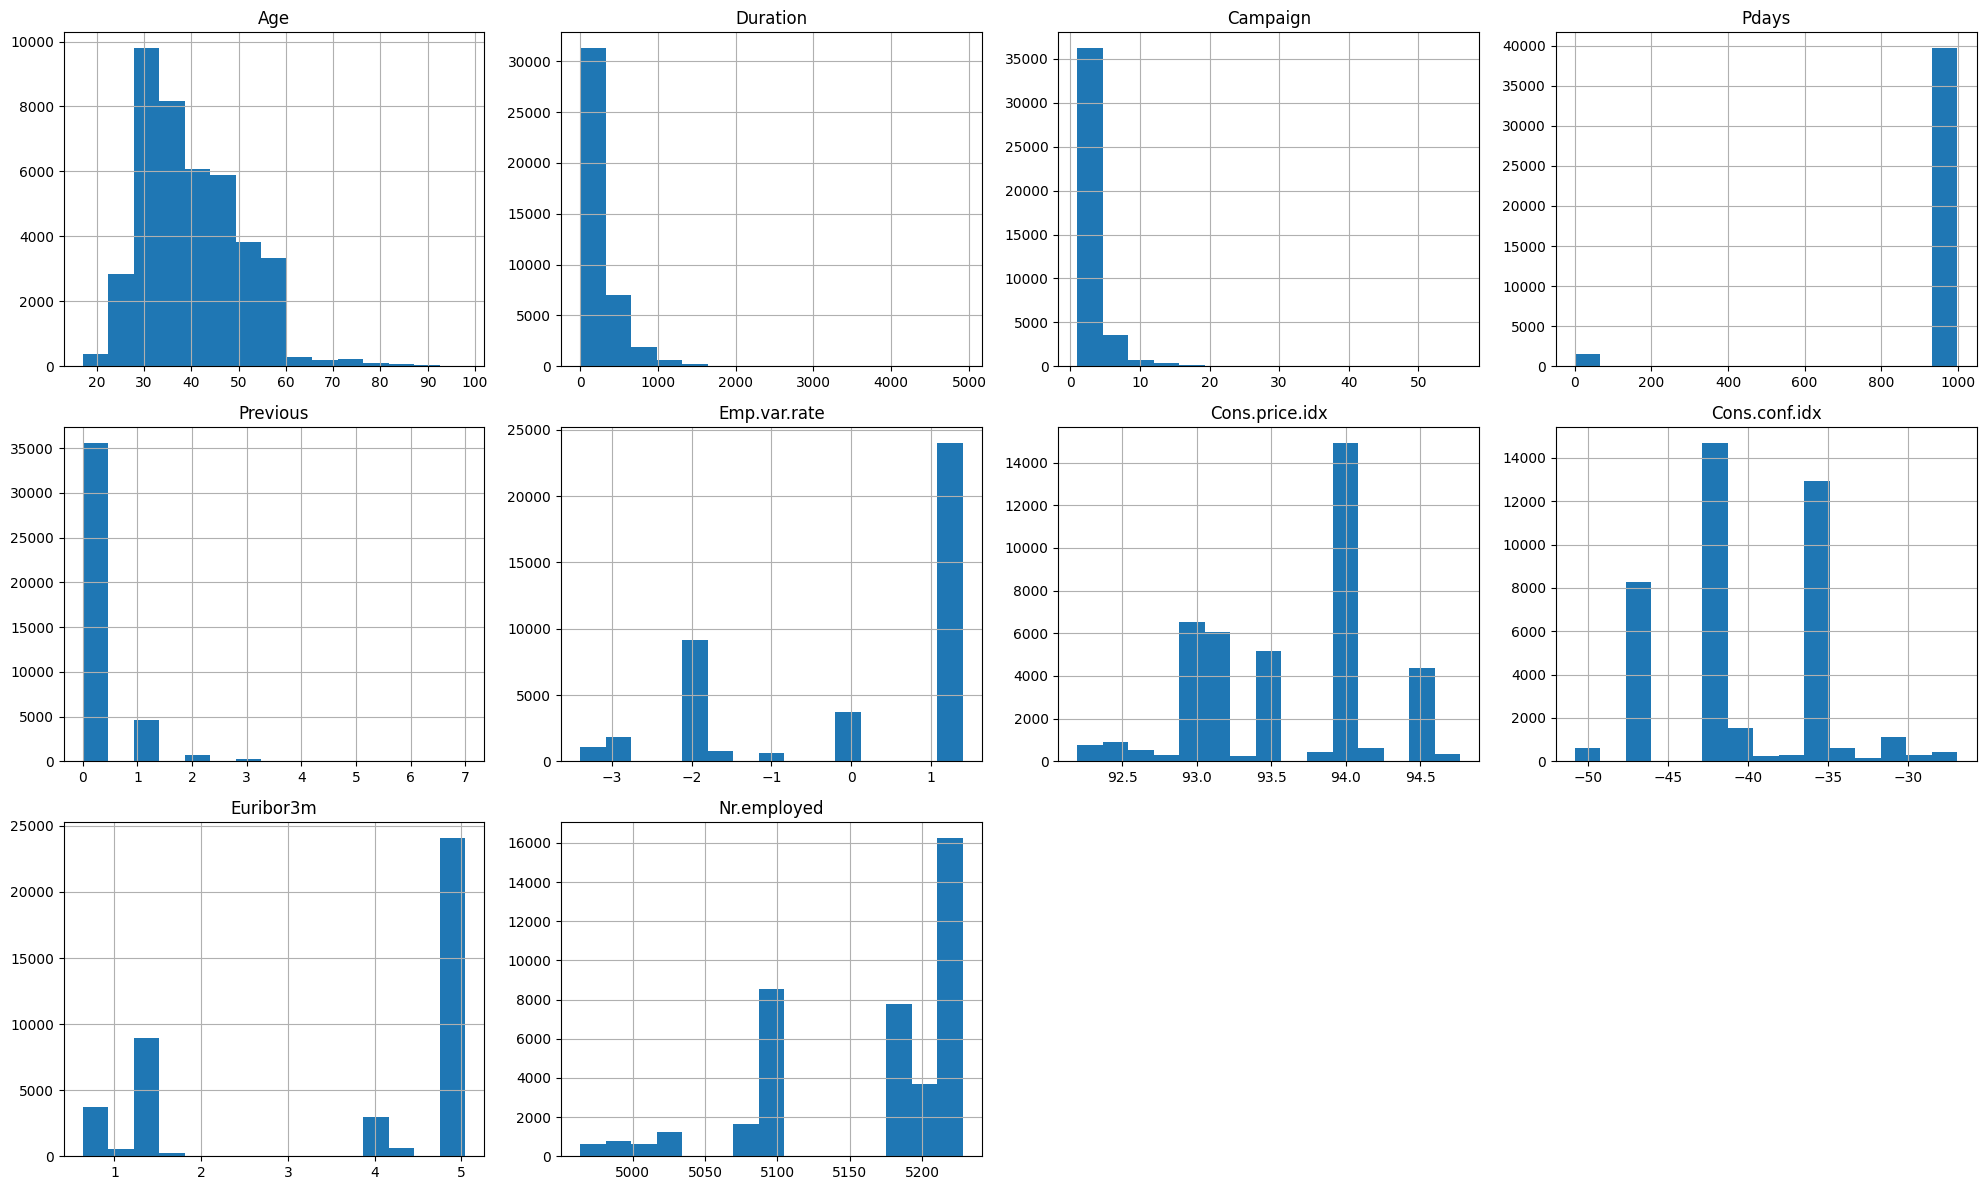

In [10]:
# Plotting histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
num_rows = int(len(numerical_features) / 4) + (len(numerical_features) % 4 > 0)
df[numerical_features].hist(bins=15, figsize=(20, num_rows * 4), layout=(num_rows, 4))
plt.tight_layout()
plt.show()

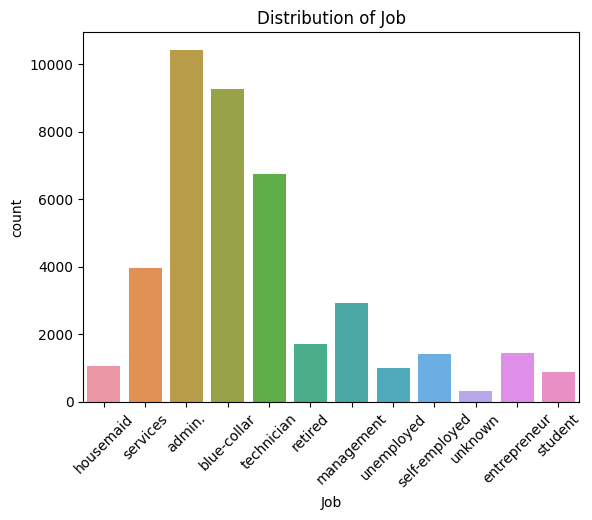

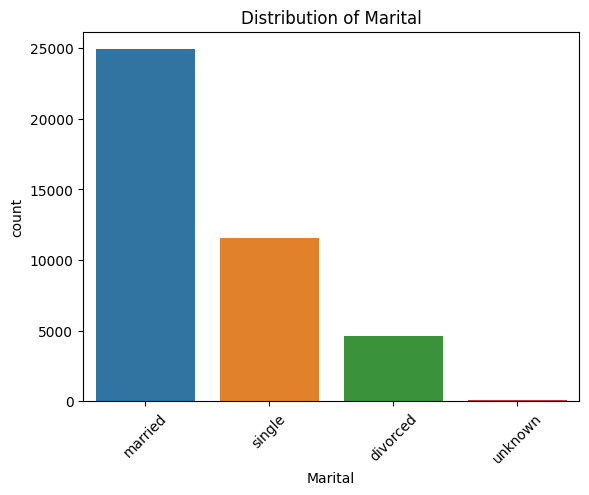

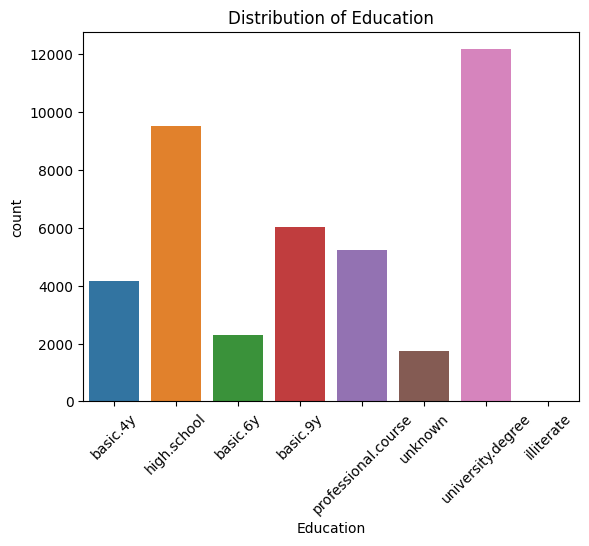

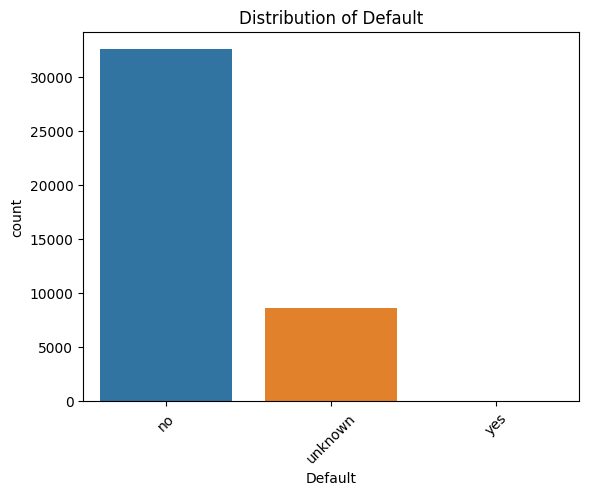

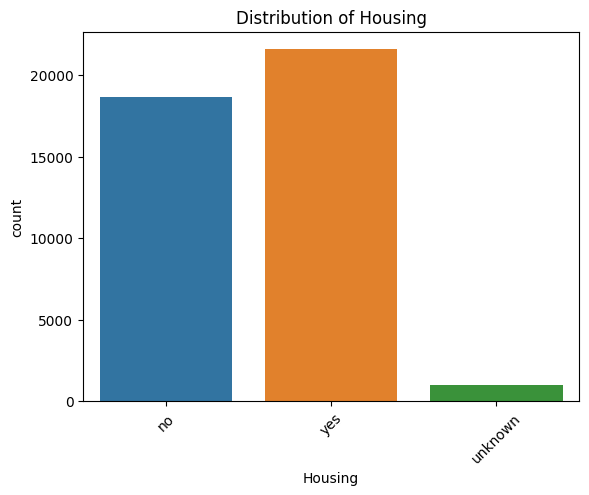

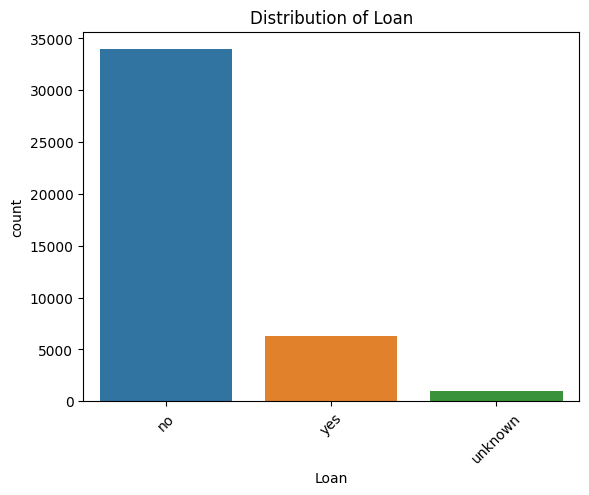

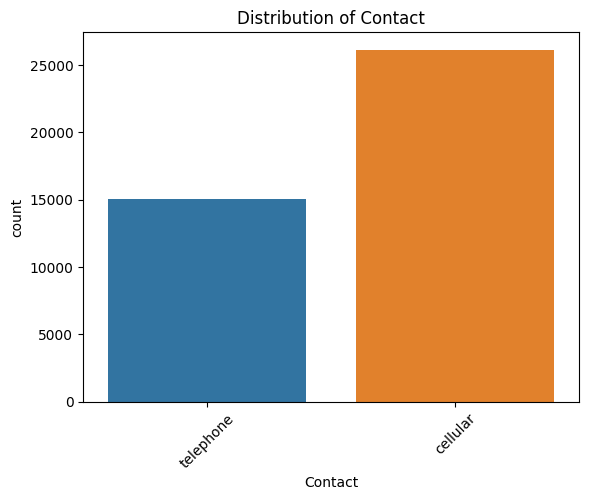

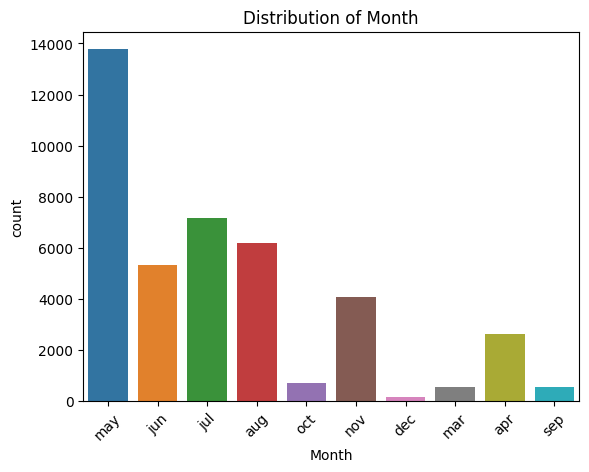

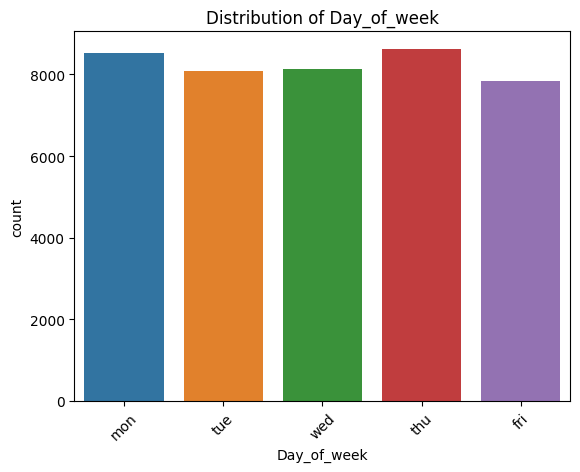

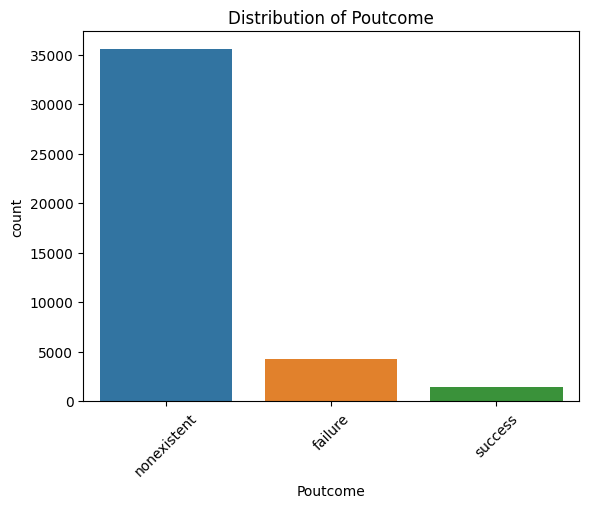

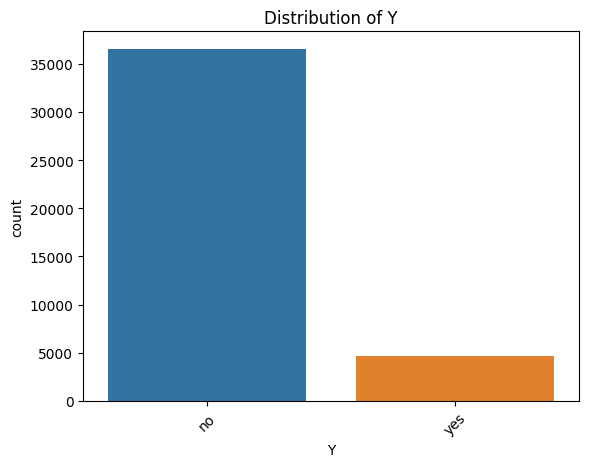

In [11]:
# Plotting count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


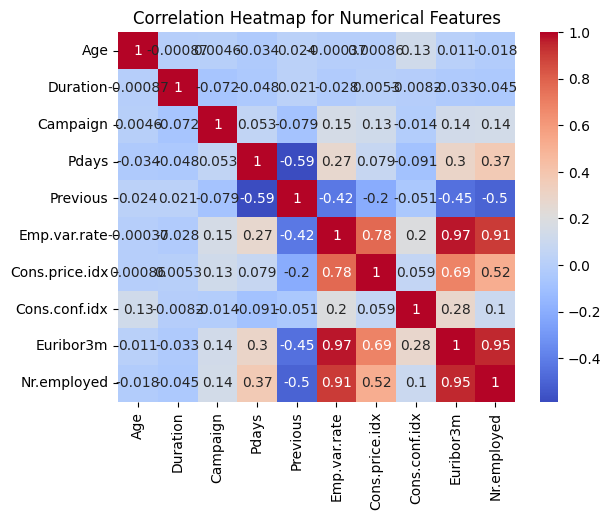

In [12]:
# Correlation heatmap for numerical features
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [15]:
df.corr()

ValueError: could not convert string to float: 'housemaid'

# 3- Preprocessing data:

In [16]:
df.isnull().sum()

Age               0
Job               0
Marital           0
Education         0
Default           0
Housing           0
Loan              0
Contact           0
Month             0
Day_of_week       0
Duration          0
Campaign          0
Pdays             0
Previous          0
Poutcome          0
Emp.var.rate      0
Cons.price.idx    0
Cons.conf.idx     0
Euribor3m         0
Nr.employed       0
Y                 0
dtype: int64

In [17]:
df = df.replace("unknown", np.nan)

In [18]:
df.isnull().sum()

Age                  0
Job                330
Marital             80
Education         1731
Default           8597
Housing            990
Loan               990
Contact              0
Month                0
Day_of_week          0
Duration             0
Campaign             0
Pdays                0
Previous             0
Poutcome             0
Emp.var.rate         0
Cons.price.idx       0
Cons.conf.idx        0
Euribor3m            0
Nr.employed          0
Y                    0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.drop(['Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed'], inplace=True, axis=1)
df

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [21]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
key=X.keys()
X

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,Pdays,Previous,Poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent


In [22]:
label=LabelEncoder()
for i in X.select_dtypes(include='object').columns:
    X[i]=label.fit_transform(X[i])

In [23]:
X

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,Pdays,Previous,Poutcome
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,334,1,999,0,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1
41185,56,5,1,6,0,1,0,0,7,0,189,2,999,0,1
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1


In [24]:
X.corr()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,Pdays,Previous,Poutcome
Age,1.000000,-0.005445,-0.401092,-0.129621,0.003171,0.004658,-0.010933,-0.011956,-0.010303,-0.013425,0.007910,-0.002364,-0.050891,0.049231,0.010737
Job,-0.005445,1.000000,0.019123,0.104364,0.015423,0.005599,-0.018978,-0.029618,-0.036197,-0.002137,-0.009140,-0.007037,-0.020336,0.012920,0.010156
Marital,-0.401092,0.019123,1.000000,0.112834,-0.003073,0.008898,0.003601,-0.059260,-0.022090,0.005922,0.002199,-0.005575,-0.028998,0.028645,0.002132
Education,-0.129621,0.104364,0.112834,1.000000,0.002447,0.020265,0.009288,-0.095676,-0.090510,-0.014948,-0.018710,0.008490,-0.028500,0.016188,0.023101
Default,0.003171,0.015423,-0.003073,0.002447,1.000000,-0.004152,-0.004271,-0.006954,-0.005200,0.006985,-0.005919,-0.004333,0.002102,0.002639,-0.006697
Housing,0.004658,0.005599,0.008898,0.020265,-0.004152,1.000000,0.046994,-0.080567,-0.013312,0.000415,-0.007806,-0.011203,-0.007542,0.021081,-0.013034
Loan,-0.010933,-0.018978,0.003601,0.009288,-0.004271,0.046994,1.000000,-0.009017,-0.003385,-0.009594,0.006320,0.006597,0.003056,-0.003506,-0.003767
Contact,-0.011956,-0.029618,-0.059260,-0.095676,-0.006954,-0.080567,-0.009017,1.000000,0.239628,-0.013464,-0.028954,0.079889,0.115152,-0.201760,0.106626
Month,-0.010303,-0.036197,-0.022090,-0.090510,-0.005200,-0.013312,-0.003385,0.239628,1.000000,0.023880,-0.000723,-0.067576,-0.046298,0.104798,-0.069068
Day_of_week,-0.013425,-0.002137,0.005922,-0.014948,0.006985,0.000415,-0.009594,-0.013464,0.023880,1.000000,0.024427,-0.039839,-0.007455,-0.004170,0.016699


In [25]:
y = y.replace(to_replace = ['yes','no'], value = ['1','0'])
y

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Y, Length: 30488, dtype: object

In [26]:
min_max = MinMaxScaler()
X_selected = X.copy()  
X_selected.iloc[:, 1:] = min_max.fit_transform(X_selected.iloc[:, 1:])
X = X_selected
X

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,Pdays,Previous,Poutcome
0,56,0.3,0.5,0.000000,0,0,0,1,0.666667,0.25,0.053070,0.000000,1.0,0.000000,0.5
2,37,0.7,0.5,0.500000,0,1,0,1,0.666667,0.25,0.045954,0.000000,1.0,0.000000,0.5
3,40,0.0,0.5,0.166667,0,0,0,1,0.666667,0.25,0.030704,0.000000,1.0,0.000000,0.5
4,56,0.7,0.5,0.500000,0,0,1,1,0.666667,0.25,0.062424,0.000000,1.0,0.000000,0.5
6,59,0.0,0.5,0.833333,0,0,0,1,0.666667,0.25,0.028264,0.000000,1.0,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.5,0.5,0.833333,0,1,0,0,0.777778,0.00,0.067914,0.000000,1.0,0.000000,0.5
41184,46,0.1,0.5,0.833333,0,0,0,0,0.777778,0.00,0.077877,0.000000,1.0,0.000000,0.5
41185,56,0.5,0.5,1.000000,0,1,0,0,0.777778,0.00,0.038430,0.023810,1.0,0.000000,0.5
41186,44,0.9,0.5,0.833333,0,0,0,0,0.777778,0.00,0.089874,0.000000,1.0,0.000000,0.5


In [27]:
X.corr()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,Pdays,Previous,Poutcome
Age,1.000000,-0.005445,-0.401092,-0.129621,0.003171,0.004658,-0.010933,-0.011956,-0.010303,-0.013425,0.007910,-0.002364,-0.050891,0.049231,0.010737
Job,-0.005445,1.000000,0.019123,0.104364,0.015423,0.005599,-0.018978,-0.029618,-0.036197,-0.002137,-0.009140,-0.007037,-0.020336,0.012920,0.010156
Marital,-0.401092,0.019123,1.000000,0.112834,-0.003073,0.008898,0.003601,-0.059260,-0.022090,0.005922,0.002199,-0.005575,-0.028998,0.028645,0.002132
Education,-0.129621,0.104364,0.112834,1.000000,0.002447,0.020265,0.009288,-0.095676,-0.090510,-0.014948,-0.018710,0.008490,-0.028500,0.016188,0.023101
Default,0.003171,0.015423,-0.003073,0.002447,1.000000,-0.004152,-0.004271,-0.006954,-0.005200,0.006985,-0.005919,-0.004333,0.002102,0.002639,-0.006697
Housing,0.004658,0.005599,0.008898,0.020265,-0.004152,1.000000,0.046994,-0.080567,-0.013312,0.000415,-0.007806,-0.011203,-0.007542,0.021081,-0.013034
Loan,-0.010933,-0.018978,0.003601,0.009288,-0.004271,0.046994,1.000000,-0.009017,-0.003385,-0.009594,0.006320,0.006597,0.003056,-0.003506,-0.003767
Contact,-0.011956,-0.029618,-0.059260,-0.095676,-0.006954,-0.080567,-0.009017,1.000000,0.239628,-0.013464,-0.028954,0.079889,0.115152,-0.201760,0.106626
Month,-0.010303,-0.036197,-0.022090,-0.090510,-0.005200,-0.013312,-0.003385,0.239628,1.000000,0.023880,-0.000723,-0.067576,-0.046298,0.104798,-0.069068
Day_of_week,-0.013425,-0.002137,0.005922,-0.014948,0.006985,0.000415,-0.009594,-0.013464,0.023880,1.000000,0.024427,-0.039839,-0.007455,-0.004170,0.016699


In [28]:
df.duplicated().values.any()

True

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().values.any()

False

In [31]:
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=101)
X_under, y_under = undersample.fit_resample(X, y)

In [32]:
scaler = StandardScaler()
scaler.fit(X_under)
scaled_features = scaler.transform(X_under)
df_feat = pd.DataFrame(scaled_features,columns=X_under.columns)
df_feat.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_of_week,Duration,Campaign,Pdays,Previous,Poutcome
0,0.039151,-0.791221,-0.351629,-1.962855,-0.011383,0.916411,-0.426108,-0.582238,0.690040,-0.030963,0.167239,-0.581125,0.364917,-0.458574,0.021192
1,-0.131181,-0.791221,1.238221,-1.962855,-0.011383,0.916411,-0.426108,1.717512,0.690040,-0.030963,-0.537432,-0.133954,0.364917,-0.458574,0.021192
2,0.039151,1.413344,-0.351629,0.525616,-0.011383,-1.091213,-0.426108,-0.582238,-1.276190,-1.474912,-0.591858,-0.581125,0.364917,-0.458574,0.021192
3,-0.642176,-1.066792,1.238221,1.023311,-0.011383,-1.091213,-0.426108,-0.582238,-0.489698,-1.474912,-0.694980,-0.133954,0.364917,-0.458574,0.021192
4,0.720479,-0.791221,-0.351629,-1.962855,-0.011383,-1.091213,-0.426108,-0.582238,-1.276190,0.691011,-0.689251,2.101899,0.364917,-0.458574,0.021192


# Models

# Spliting data to train and test:

In [33]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_feat, y_under, test_size=0.25, random_state=42) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 1930
number of training samples: 5788


# 1- Naive baise:

In [34]:
NB = GaussianNB()
NB.fit(x_train1, y_train1)

GaussianNB()

In [35]:
y_pred = NB.predict(x_test1)

In [36]:
NB_CM = confusion_matrix(y_test1, y_pred)
print(NB_CM)

[[852 135]
 [435 508]]


In [37]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test1,y_pred))

Accuracy Score:
0.7046632124352331


In [38]:
print (classification_report(y_test1,y_pred ))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       987
           1       0.79      0.54      0.64       943

    accuracy                           0.70      1930
   macro avg       0.73      0.70      0.69      1930
weighted avg       0.72      0.70      0.70      1930



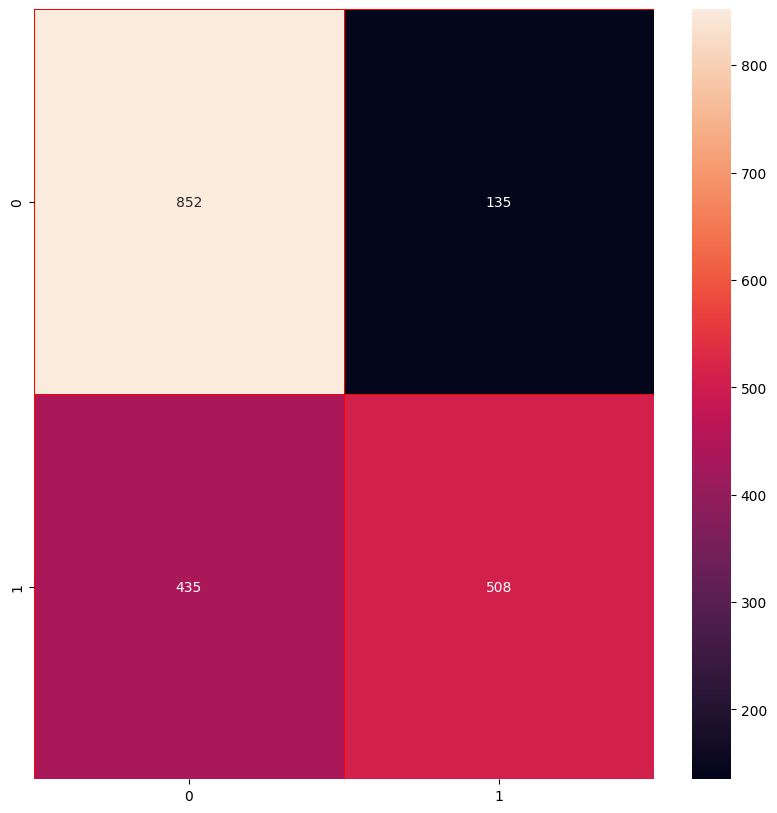

<Figure size 640x480 with 0 Axes>

In [39]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(NB_CM, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

# 2- KNN:

In [40]:
KNN = KNeighborsClassifier(n_neighbors= 1)

In [41]:
KNN.fit(x_train1,y_train1)

KNeighborsClassifier(n_neighbors=1)

In [42]:
KNN.score(x_test1,y_test1)

0.7207253886010363

In [43]:
error_rate = []

# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train1)
    pred_i = knn.predict(x_test1)
    error_rate.append(np.mean(pred_i != y_test1))

Text(0, 0.5, 'Error Rate')

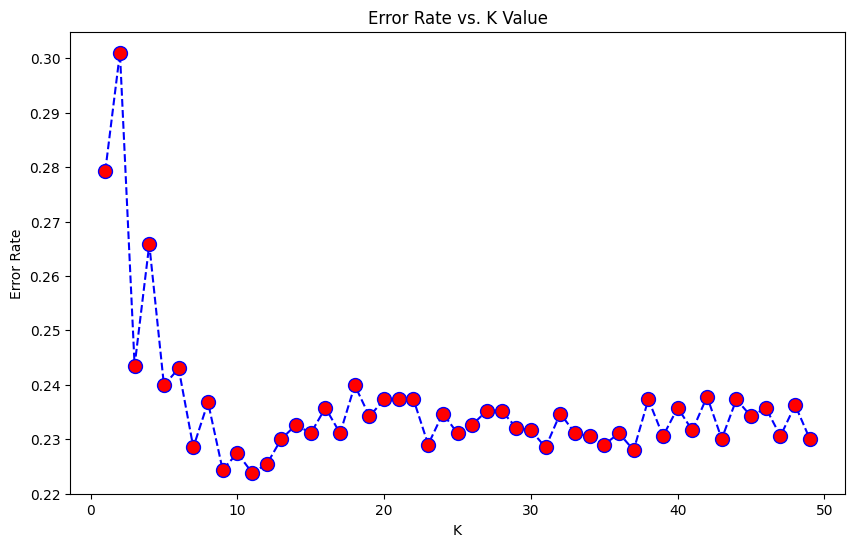

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
KNN = KNeighborsClassifier(n_neighbors= 10)
KNN.fit(x_train1,y_train1)
KNN.score(x_test1,y_test1)

0.7725388601036269

In [46]:
from sklearn.metrics import classification_report
print (classification_report(y_test1,y_pred ))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       987
           1       0.79      0.54      0.64       943

    accuracy                           0.70      1930
   macro avg       0.73      0.70      0.69      1930
weighted avg       0.72      0.70      0.70      1930



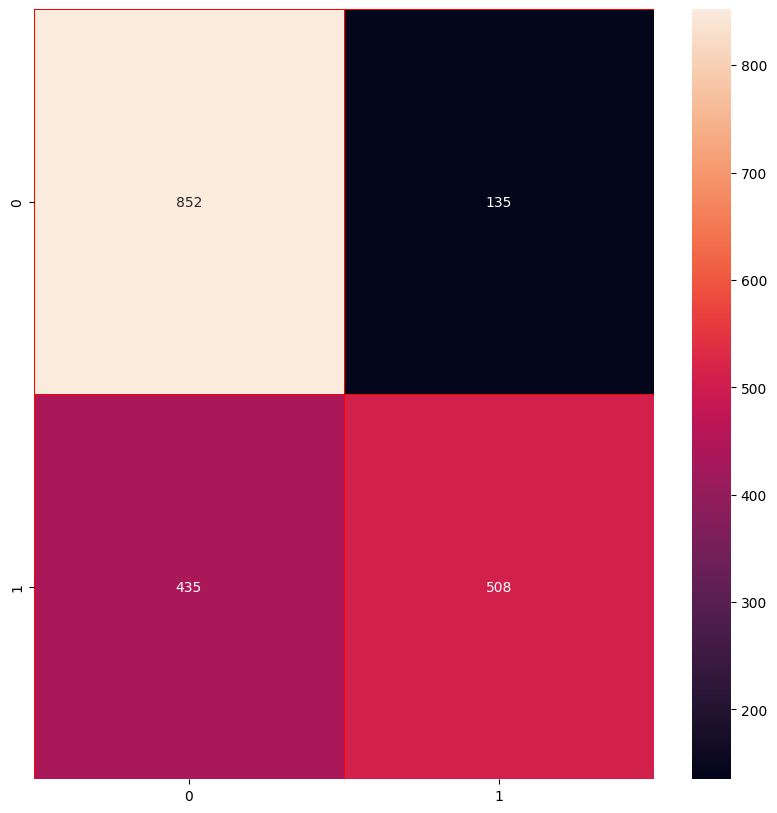

<Figure size 640x480 with 0 Axes>

In [47]:
cm = confusion_matrix(y_test1, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [48]:
n_neighbours_values = list(range(1, 31))
accuracy_train_values = []
accuracy_test_values = []

for n_neighbours in n_neighbours_values:
    NB = KNeighborsClassifier(n_neighbors = n_neighbours)
    NB.fit(x_train1, y_train1)
    y_pred_train = NB.predict(x_train1)
    y_pred_test = NB.predict(x_test1)
    accuracy_train = accuracy_score(y_train1, y_pred_train)
    accuracy_test = accuracy_score(y_test1, y_pred_test)
    accuracy_train_values.append(accuracy_train)
    accuracy_test_values.append(accuracy_test)
    
results = pd.DataFrame({
    'n_neighbours': n_neighbours_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_test': accuracy_test_values
})

In [49]:
results

,n_neighbours,accuracy_train,accuracy_test
0,1,1.000000,0.720725
1,2,0.846234,0.698964
2,3,0.868694,0.756477
3,4,0.826365,0.734197
4,5,0.837422,0.760104
5,6,0.809433,0.756995
6,7,0.822737,0.771503
7,8,0.802695,0.763212
8,9,0.807360,0.775648
9,10,0.795957,0.772539


According to the previous plot, we select `n_neighbours = 7` as the best value for `n_neighbours`

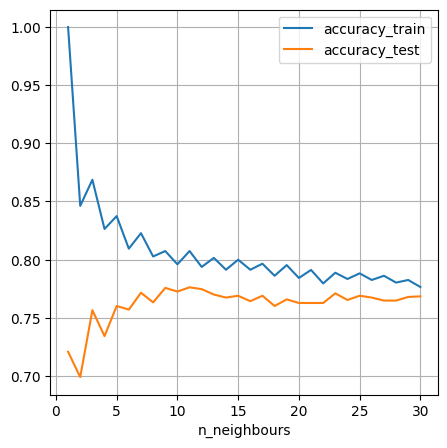

In [50]:
results.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_test'], figsize=(5, 5))
plt.grid(axis='both')

In [51]:
KNN = KNeighborsClassifier(n_neighbors= 7)
KNN.fit(x_train1,y_train1)
KNN.score(x_test1,y_test1)

0.7715025906735752

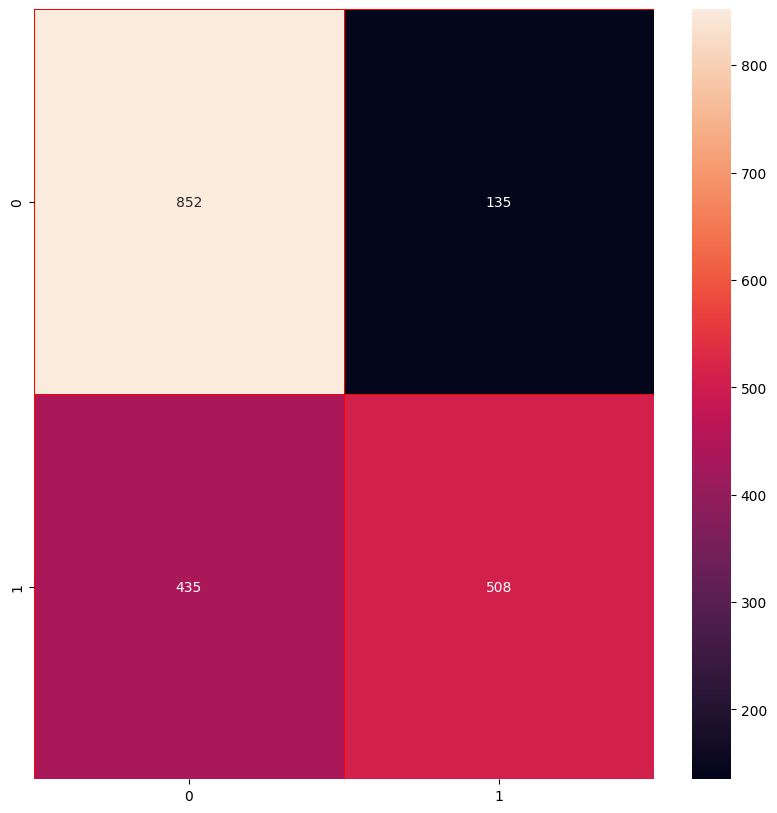

<Figure size 640x480 with 0 Axes>

In [52]:
cm = confusion_matrix(y_test1, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

# 3- Decision tree:

In [53]:
DT = DecisionTreeClassifier(random_state=0)

In [54]:
DT.fit(x_train1,y_train1)

DecisionTreeClassifier(random_state=0)

In [55]:
DT.score(x_test1,y_test1)

0.7854922279792746

In [56]:
params =  {
    'min_samples_leaf': [7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'max_depth': [8,9,10,11,12,13]
}

In [57]:
grid = GridSearchCV(estimator=DT,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=2)

In [58]:
grid.fit(x_train1, y_train1)

grid.best_score_, grid.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ....................max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END ....................max_depth=8, min_samples_leaf=9; total time=   0.0s
[CV] END ....................max_depth=8, min_s

(0.8291319788088722, {'max_depth': 11, 'min_samples_leaf': 20})

# 4- Random forest:

In [59]:
RF = RandomForestClassifier()

In [60]:
RF.fit(x_train1,y_train1)

RandomForestClassifier()

In [61]:
RF.score(x_test1,y_test1)

0.8398963730569948

In [62]:
params = {
    'n_estimators': [5,10,50, 100, 200, 500, 800],
    'n_jobs': [-1]
}

In [63]:
grid = GridSearchCV(estimator=RF,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=2)

In [64]:
grid.fit(x_train1, y_train1)

grid.best_score_, grid.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..........................n_estimators=5, n_jobs=-1; total time=   0.1s
[CV] END ..........................n_estimators=5, n_jobs=-1; total time=   0.1s
[CV] END ..........................n_estimators=5, n_jobs=-1; total time=   0.1s
[CV] END ..........................n_estimators=5, n_jobs=-1; total time=   0.1s
[CV] END ..........................n_estimators=5, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END .........................n_estimators=50, n_jobs=-1; total time=   0.2s
[CV] END .........................n_estimators=50

(0.8365627561005102, {'n_estimators': 500, 'n_jobs': -1})

Best_parameters: {'n_estimators': 100, 'n_jobs': -1}

# 5- Support vector machine:

In [65]:
SVM = SVC(random_state= 0)

In [66]:
SVM.fit(x_train1,y_train1)

SVC(random_state=0)

In [67]:
SVM.score(x_test1,y_test1)

0.8176165803108808

In [68]:
params = {'C': [0.125, 0.25,0.5, 1, 2], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid','linear']} 

In [69]:
grid = GridSearchCV(estimator=SVM,
                    param_grid=params,
                    cv=2,
                    n_jobs=1,
                    verbose=2)

In [70]:
grid.fit(x_train1, y_train1)

grid.best_score_, grid.best_params_

Fitting 2 folds for each of 75 candidates, totalling 150 fits
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.125, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ...................C=0.125, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=0.125, gamma=1, kernel=sigmoid; total time=   0.6s
[CV] END ....................C=0.125, gamma=1, kernel=linear; total time=   0.3s
[CV] END ....................C=0.125, gamma=1, kernel=linear; total time=   0.3s
[CV] END .....................C=0.125, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.125, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .................C=0.125, gamma=0.1, kernel=sigmoid; total time=   0.6s
[CV] END .................C=0.125, gamma=0.1, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.125, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END ..................C=0.125, gamma=0.1, 

(0.8040774015203871, {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'})

Best_parameters: {'C': 0.5, 'gamma': 1, 'kernel': 'linear'})

In [71]:
SVM_best = SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'],kernel=grid.best_params_['kernel'],random_state=0)

In [72]:
SVM_best.fit(x_train1, y_train1)

SVC(C=0.5, gamma=0.1, random_state=0)

In [73]:
print(SVM_best.score(x_train1, y_train1))

0.8299930891499654


In [74]:
y_pred_test = SVM_best.predict(x_test1)
print(accuracy_score(y_test1, y_pred_test))

0.8129533678756476


In [75]:
print (classification_report(y_test1,y_pred_test ))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       987
           1       0.82      0.80      0.81       943

    accuracy                           0.81      1930
   macro avg       0.81      0.81      0.81      1930
weighted avg       0.81      0.81      0.81      1930



In [76]:
cv= confusion_matrix(y_test1,y_pred_test )
cv

array([[819, 168],
       [193, 750]])

# 6- Logistic regrssion:

In [77]:
def eval_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

In [78]:
LR =Pipeline([
    ('feature_scaling', StandardScaler()),
    ('logistic_regression', LogisticRegression(random_state=0))
])
eval_model(LR, x_train1, y_train1, x_test1, y_test1)

(0.7916378714581893, 0.7937823834196891)

In [79]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_train_values = []
acc_test_values = []

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('logistic_regression', LogisticRegression(C=C, random_state=0))
    ])
    acc_train, acc_test = eval_model(LR, x_train1, y_train1, x_test1, y_test1)
    acc_train_values.append(acc_train)
    acc_test_values.append(acc_test)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_test': acc_test_values
})

results

,C,acc_train,acc_test
0,0.0001,0.791638,0.793782
1,0.0010,0.791638,0.793782
2,0.0100,0.791638,0.793782
3,0.1000,0.791638,0.793782
4,1.0000,0.791638,0.793782
5,10.0000,0.791638,0.793782
6,100.0000,0.791638,0.793782
7,1000.0000,0.791638,0.793782
8,10000.0000,0.791638,0.793782


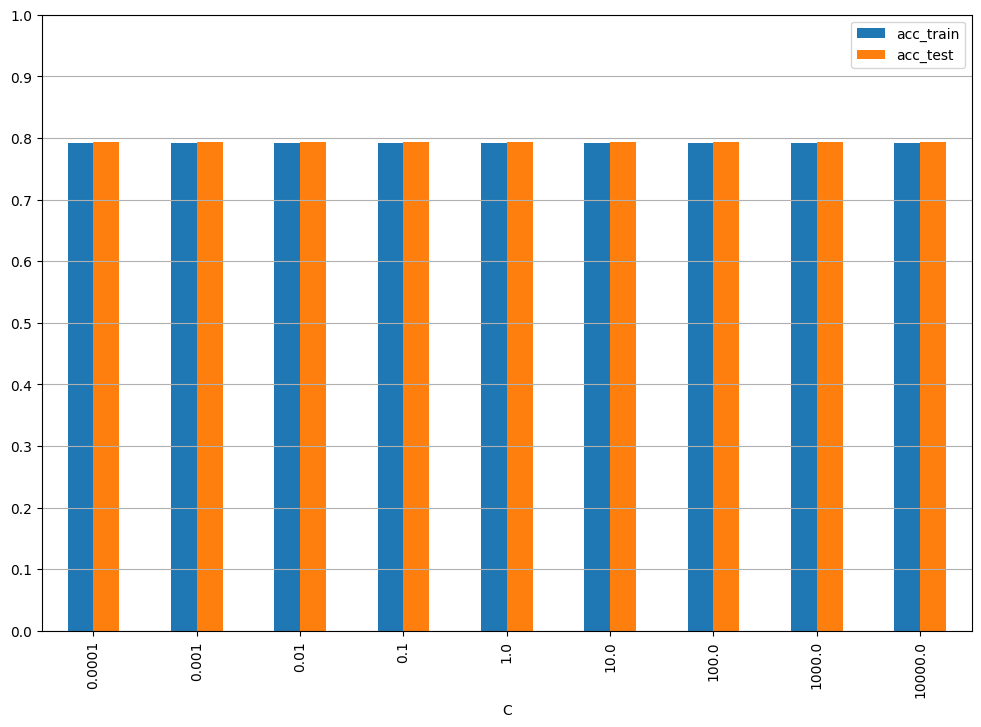

In [80]:
results.plot.bar(x='C', y=['acc_train', 'acc_test'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

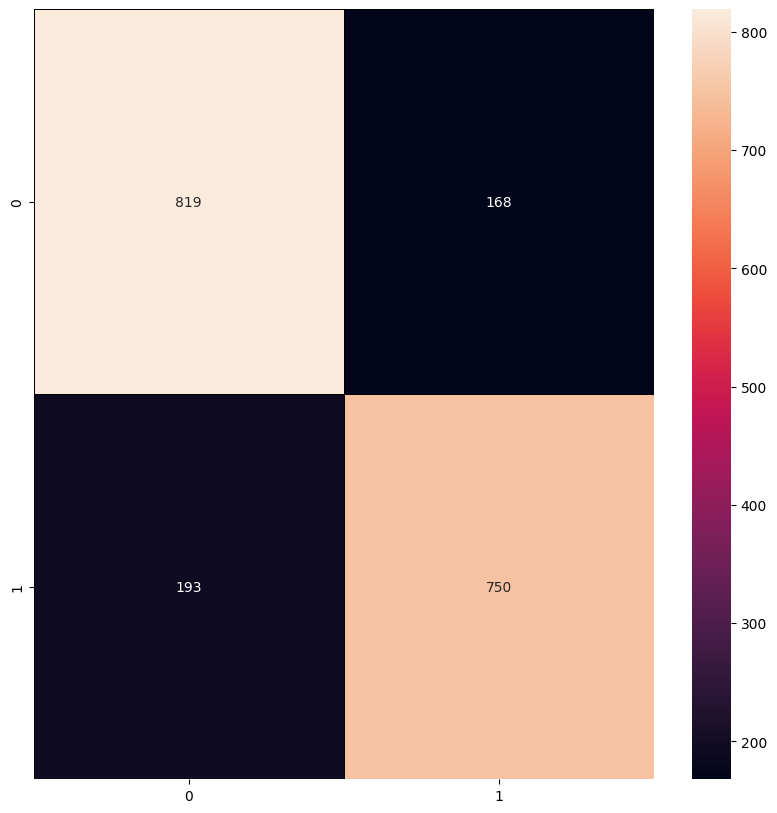

<Figure size 640x480 with 0 Axes>

In [81]:
L_cm = confusion_matrix(y_test1, y_pred_test)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(L_cm, annot=True, linewidths=0.5,linecolor="black", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')